In [16]:
from os import listdir
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from PIL import Image
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import random

In [17]:
def load_photos(directory):
    images = []
    labels_dir = []
    dir_list = listdir(directory)
    random.shuffle(dir_list)
    for name in dir_list:
        filename = directory + '/' + name
        # load an image from file
        image = load_img(filename, target_size=(96, 160))
        # convert the image pixels to a numpy array
        image = img_to_array(image)
        # get image id + labels
        value_dir = float(name.split('_')[0])
        labels_dir.append(value_dir)
        images.append(image)
    return images, labels_dir

In [18]:
dataset = "../../../../Big_Race"

In [19]:
# load images from both train and test groups
directory = dataset+'/Train'
images, labels_dir = load_photos(directory)
nb_images = len(images)
print('Loaded Images and labels for training: %d' % nb_images)

Loaded Images and labels for training: 3270


In [20]:
#Normalise images
images = np.array(images)
images /= 255.0

In [21]:
#convert datas to dummyvalues
labels_dir = np.array(pd.get_dummies(labels_dir))

(array([0, 1, 0], dtype=uint8), <matplotlib.image.AxesImage at 0x1aa4fc600b8>)

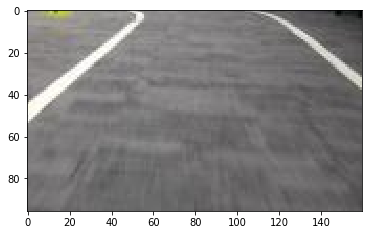

In [22]:
labels_dir[42], plt.imshow(images[42])

In [23]:
from keras.models import Model, Sequential
from keras.layers import *
import keras.backend as K
import keras.optimizers as Optimizers
import keras.callbacks

In [24]:
#from keras.models import load_model
#model = load_model("model_bigrace_original_5.h5")

In [25]:
'''
Model from PatateV2
'''

K.clear_session()
############################################################# 

img_in = Input(shape=(96, 160, 3), name='img_in')
x = img_in

x = Convolution2D(2, (5,5), strides=(2,2), use_bias=False)(x)       
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Convolution2D(4, (5,5), strides=(2,2), use_bias=False)(x)       
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Dropout(.4)(x)
x = Convolution2D(8, (5,5), strides=(2,2), use_bias=False)(x)       
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Dropout(.5)(x)

x = Flatten(name='flattened')(x)

x = Dense(100, use_bias=False)(x) 
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Dropout(.4)(x)
x = Dense(50, use_bias=False)(x)  
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Dropout(.3)(x)

out_dir = Dense(3, activation='softmax')(x)


# Compile Model
model = Model(inputs=[img_in], outputs=[out_dir])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img_in (InputLayer)          (None, 96, 160, 3)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 78, 2)         150       
_________________________________________________________________
batch_normalization_1 (Batch (None, 46, 78, 2)         8         
_________________________________________________________________
activation_1 (Activation)    (None, 46, 78, 2)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 37, 4)         200       
_________________________________________________________________
batch_normalization_2 (Batch (None, 21, 37, 4)         16        
_________________________________________________________________
activation_2 (Activation)    (None, 21, 37, 4)         0         
__________

In [26]:
model_name="model_race2.h5"

In [27]:
#save best model if model improved
best_checkpoint = keras.callbacks.ModelCheckpoint(model_name, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [28]:
h = model.fit(images, labels_dir, batch_size=64, epochs=100, validation_split=0.2, verbose=1, callbacks=[best_checkpoint])

Train on 2616 samples, validate on 654 samples
Epoch 1/100
2616/2616 [==============================] - 7s 3ms/step - loss: 1.2318 - acc: 0.4167 - val_loss: 0.8997 - val_acc: 0.5566

Epoch 00001: val_loss improved from inf to 0.89967, saving model to model_race2.h5
Epoch 2/100
2616/2616 [==============================] - 6s 2ms/step - loss: 0.9485 - acc: 0.5482 - val_loss: 0.8171 - val_acc: 0.5948

Epoch 00002: val_loss improved from 0.89967 to 0.81709, saving model to model_race2.h5
Epoch 3/100
2616/2616 [==============================] - 6s 2ms/step - loss: 0.8044 - acc: 0.6216 - val_loss: 0.5818 - val_acc: 0.7385

Epoch 00003: val_loss improved from 0.81709 to 0.58184, saving model to model_race2.h5
Epoch 4/100
2616/2616 [==============================] - 6s 2ms/step - loss: 0.7194 - acc: 0.6739 - val_loss: 0.5956 - val_acc: 0.7492

Epoch 00004: val_loss did not improve
Epoch 5/100
2616/2616 [==============================] - 6s 2ms/step - loss: 0.6537 - acc: 0.7080 - val_loss: 0.50


Epoch 00041: val_loss did not improve
Epoch 42/100
2616/2616 [==============================] - 7s 3ms/step - loss: 0.2662 - acc: 0.8960 - val_loss: 0.2281 - val_acc: 0.9159

Epoch 00042: val_loss did not improve
Epoch 43/100
2616/2616 [==============================] - 7s 3ms/step - loss: 0.2586 - acc: 0.8968 - val_loss: 0.1989 - val_acc: 0.9220

Epoch 00043: val_loss improved from 0.20851 to 0.19888, saving model to model_race2.h5
Epoch 44/100
2616/2616 [==============================] - 7s 3ms/step - loss: 0.2520 - acc: 0.9037 - val_loss: 0.2006 - val_acc: 0.9343

Epoch 00044: val_loss did not improve
Epoch 45/100
2616/2616 [==============================] - 8s 3ms/step - loss: 0.2670 - acc: 0.8884 - val_loss: 0.2086 - val_acc: 0.9205

Epoch 00045: val_loss did not improve
Epoch 46/100
2616/2616 [==============================] - 7s 3ms/step - loss: 0.2520 - acc: 0.8995 - val_loss: 0.1870 - val_acc: 0.9312

Epoch 00046: val_loss improved from 0.19888 to 0.18704, saving model to mod

2616/2616 [==============================] - 8s 3ms/step - loss: 0.2140 - acc: 0.9193 - val_loss: 0.2071 - val_acc: 0.9190

Epoch 00087: val_loss did not improve
Epoch 88/100
2616/2616 [==============================] - 8s 3ms/step - loss: 0.2046 - acc: 0.9182 - val_loss: 0.1918 - val_acc: 0.9343

Epoch 00088: val_loss did not improve
Epoch 89/100
2616/2616 [==============================] - 7s 3ms/step - loss: 0.2012 - acc: 0.9201 - val_loss: 0.1858 - val_acc: 0.9205

Epoch 00089: val_loss did not improve
Epoch 90/100
2616/2616 [==============================] - 8s 3ms/step - loss: 0.1945 - acc: 0.9258 - val_loss: 0.2045 - val_acc: 0.9220

Epoch 00090: val_loss did not improve
Epoch 91/100
2616/2616 [==============================] - 10s 4ms/step - loss: 0.2115 - acc: 0.9163 - val_loss: 0.1956 - val_acc: 0.9266

Epoch 00091: val_loss did not improve
Epoch 92/100
2616/2616 [==============================] - 8s 3ms/step - loss: 0.2014 - acc: 0.9201 - val_loss: 0.1846 - val_acc: 0.9312



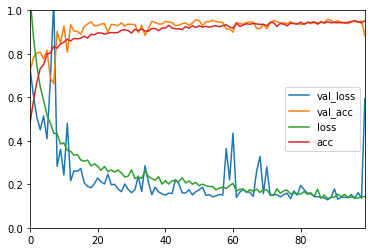

In [15]:
#print History graph
historydf = pd.DataFrame(h.history, index=h.epoch)
historydf.plot(ylim=(0,1))